# Voxel grid demo

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from moleculekit.smallmol.smallmol import SmallMol
from moleculekit.tools.voxeldescriptors import getVoxelDescriptors, viewVoxelFeatures
import pickle
import os

def change_directory_to_repo():
    """Changes working directory to the repository root folder."""
    current_dir = Path.cwd()
    for parent in current_dir.parents:
        # Repository is the first folder with the .git folder
        files = list(parent.glob(".git"))
        if files:
            os.chdir(str(parent))

change_directory_to_repo()

In [4]:
with open('data/conformers/train_conformers', 'rb') as f:
    conformers = pickle.load(f)

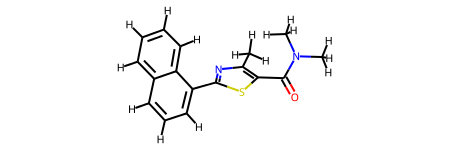

In [28]:
molecule = conformers[0][0]
molecule

In [29]:
molecule = SmallMol(molecule)
voxel, center, N = getVoxelDescriptors(molecule, boxsize=[10, 10, 10], voxelsize=0.5, center=[0.0, 0.0, 0.0])

In [30]:
def plot_voxels(voxels, threshold=1.0, channel=-1):
    """Plot voxels with density >= than threshold."""
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(projection='3d')
    ax.voxels(voxels[:, :, :, channel] >= threshold, facecolors='red')

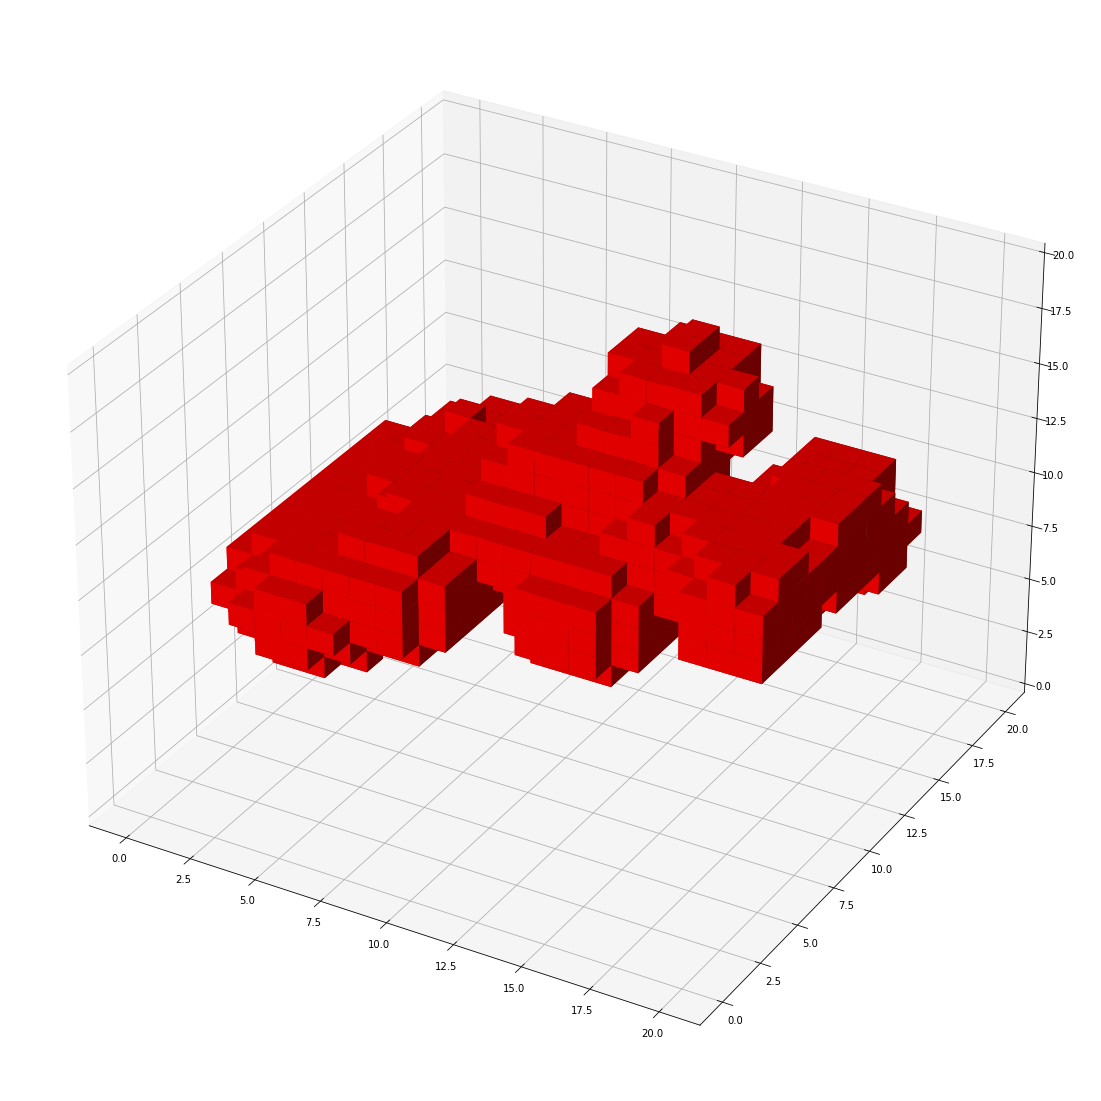

In [31]:
plot_voxels(voxel.reshape((20, 20, 20, 8)))